# Customer Segmentation - Clustering K-means

- author: Virginia Ordoño Bernier
- date: April 2024

La agrupación de tarjetas de crédito significa agrupar a los titulares de tarjetas de crédito en función de sus hábitos de compra, límites de crédito y muchos más factores financieros. También se conoce como segmentación de tarjetas de crédito. Dicho análisis de agrupamiento ayuda a las empresas a encontrar a sus clientes potenciales y muchas más estrategias de marketing.

Para la tarea de agrupación de tarjetas de crédito con Machine Learning, necesitamos tener un conjunto de datos basado en el historial de compras de los titulares de tarjetas de crédito. 

Realiza un análisis cluster de los datos que puedes descargar desde [aquí](https://statso.io/customer-segmentation-case-study/).

## 1. Carga de datos

In [1]:
import sys
sys.path.append('./')
from my_utils import *

import pandas as pd # type: ignore

data_csv = '../data/customer_segmentation.csv'
df = pd.read_csv(data_csv)
df.columns = df.columns.str.replace(' ', '_').str.lower()
df = df.drop('cust_id', axis=1)

df.head(10)

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


## 2. Análisis Exploratorio de Datos

In [2]:
df.shape

(8950, 17)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           8950 non-null   float64
 1   balance_frequency                 8950 non-null   float64
 2   purchases                         8950 non-null   float64
 3   oneoff_purchases                  8950 non-null   float64
 4   installments_purchases            8950 non-null   float64
 5   cash_advance                      8950 non-null   float64
 6   purchases_frequency               8950 non-null   float64
 7   oneoff_purchases_frequency        8950 non-null   float64
 8   purchases_installments_frequency  8950 non-null   float64
 9   cash_advance_frequency            8950 non-null   float64
 10  cash_advance_trx                  8950 non-null   int64  
 11  purchases_trx                     8950 non-null   int64  
 12  credit

In [4]:
ma = df.cash_advance_trx.unique().max()
mi = df.cash_advance_trx.unique().min()

print(f'min: {mi}, max: {ma}')

min: 0, max: 123


### 2.1. Explicación de las propiedades

- balance: El saldo actual de la tarjeta de crédito. Floats.min: 0.0, max: 19043.13856
- balance_frequency: La frecuencia con la que el saldo se actualiza. min: 0.0, max: 1.0
- purchases: El total de compras realizadas con la tarjeta de crédito. Floats. min: 0.0, max: 1.0
- oneoff_purchases: El total de compras realizadas en una sola transacción (pago único). Floats min: 0.0, max: 40761.25
- installments_purchases: El total de compras realizadas a plazos. Floats. min: 0.0, max: 22500.0
- cash_advance: El total de avances de efectivo realizados con la tarjeta.Floats. min: 0.0, max: 47137.21176
- purchases_frequency: La frecuencia con la que se realizan compras con la tarjeta de crédito. Floats. min: 0.0, max: 1.0
- oneoff_purchases_frequency: La frecuencia con la que se realizan compras de pago único. Floats. min: 0.0, max: 1.0.
- purchases_installments_frequency: La frecuencia con la que se realizan compras a plazos. Floats. min: 0.0, max: 1.0.
- cash_advance_frequency: La frecuencia con la que se realizan avances de efectivo.min: 0.0, max: 1.0.
- cash_advance_trx: El número de transacciones de avance de efectivo realizadas. Floats. min: -0.47606981743568183, max: 17.547848005038105
- purchases_trx: El número de transacciones de compra realizadas. Floats. min: -0.5917958767710622, max: 13.811014304251477.
- credit_limit: El límite de crédito asignado a la tarjeta. Floats. min: -1.2214790667982178, max: 7.0100629818298215
- payments: El total de pagos realizados para pagar el saldo de la tarjeta de crédito. Floats. min: -0.5986882602099773, max: 16.922278965096325
- minimum_payments: El total de pagos mínimos realizados. Floats. min: -0.3570349520257533, max: 32.353070425506566
- prc_full_payment: El porcentaje de veces que el cliente paga el saldo total de la tarjeta.min: -0.5255509710834134, max: 2.8934528534744284
- tenure: El tiempo (en meses) que el cliente ha tenido la tarjeta de crédito.min: -4.12276756834523, max: 0.36067954425377496

### 2.2. Gestión de duplicados

In [5]:
if df.duplicated().any():
    duplicated_rows = df[df.duplicated(keep=False)]  # keep=False para marcar todas las filas duplicadas
    print(duplicated_rows)

### 2.3. Gestión de valores negativos inesperados

- cash_advance_trx, purchases_trx, credit_limit, payments, minimum_payments, y prc_full_payment tienen valores mínimos negativos, lo cual no es lógico.
- tenure tiene valores mínimos negativos, lo cual es inconsistente ya que el tiempo no puede ser negativo.

In [6]:
# Columnas con valores mínimos negativos
negative_values_columns= [
    'cash_advance_trx', 'purchases_trx', 'credit_limit',
    'payments', 'minimum_payments', 'prc_full_payment', 'tenure'
]

# Suprimir valores negativos por NaN en las columnas especificadas
for column in negative_values_columns:
    df[column] = df[column].mask(df[column] < 0)


### 2.4. Gestión de NaN

In [7]:
if (df.isna().sum() > 0).any():
    print(df.isna().sum()[df.isna().sum() > 0])

credit_limit          1
minimum_payments    313
dtype: int64


### 2.5. Visualización datos numéricos para imputacion de NaN

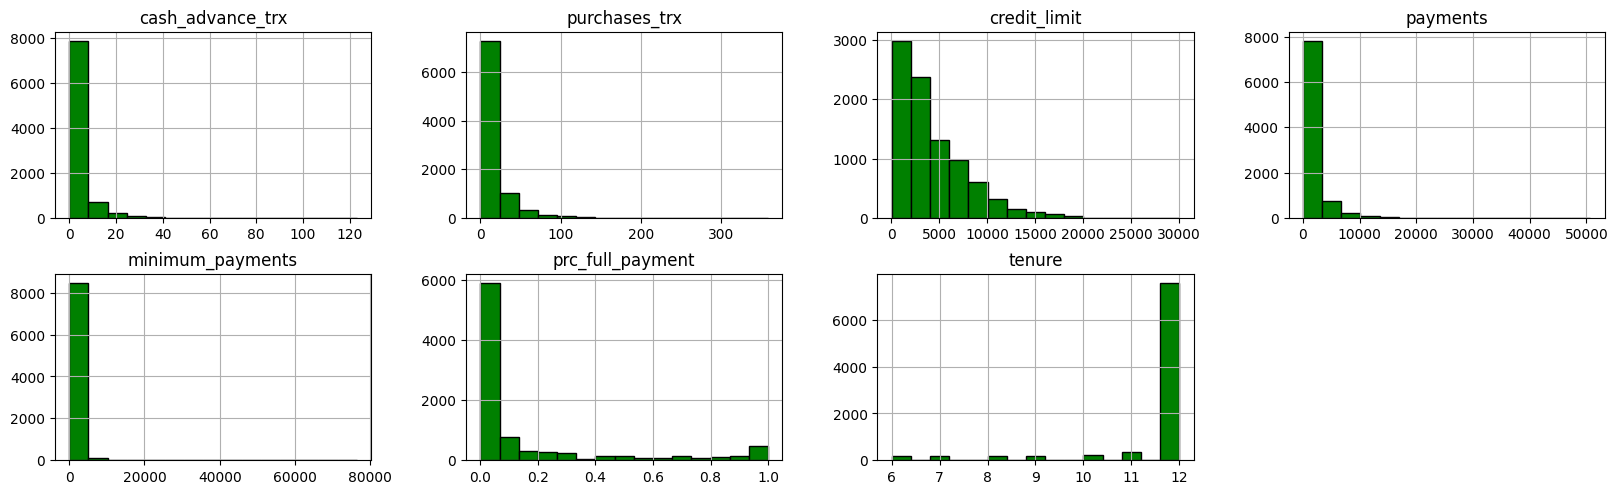

In [8]:
features_with_negative_values = df[['cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments', 
                    'minimum_payments', 'prc_full_payment', 'tenure']]
df[features_with_negative_values.columns].hist(bins=15, figsize=(20, 15), layout=(5, 4), color='green', edgecolor='black');

In [9]:
features_with_negative_values.describe()

,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
# Desviación estándar alta y valores máximos significativamente más altos que los valores del percentil 75%
# Posibles outliers. Aplicamos la imputación de nan con la mediana

df['cash_advance_trx'].fillna(df['cash_advance_trx'].median(), inplace=True)
df['purchases_trx'].fillna(df['purchases_trx'].median(), inplace=True)
df['credit_limit'].fillna(df['credit_limit'].median(), inplace=True)
df['payments'].fillna(df['payments'].median(), inplace=True)
df['minimum_payments'].fillna(df['minimum_payments'].median(), inplace=True)
df['prc_full_payment'].fillna(df['prc_full_payment'].median(), inplace=True)

# Tenure tiene muchos valores parecidos por lo que se imputa con la moda
df['tenure'].fillna(df['tenure'].mode()[0], inplace=True)

In [11]:
if (df.isna().sum() > 0).any():
    print(df.isna().sum()[df.isna().sum() > 0])

### 2.6. Escalamiento de los datos

In [12]:
from sklearn.preprocessing import StandardScaler # type: ignore

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df = pd.DataFrame(scaled_features, columns=df.columns)

df.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


## 3. Gráficos BIC y Elbow

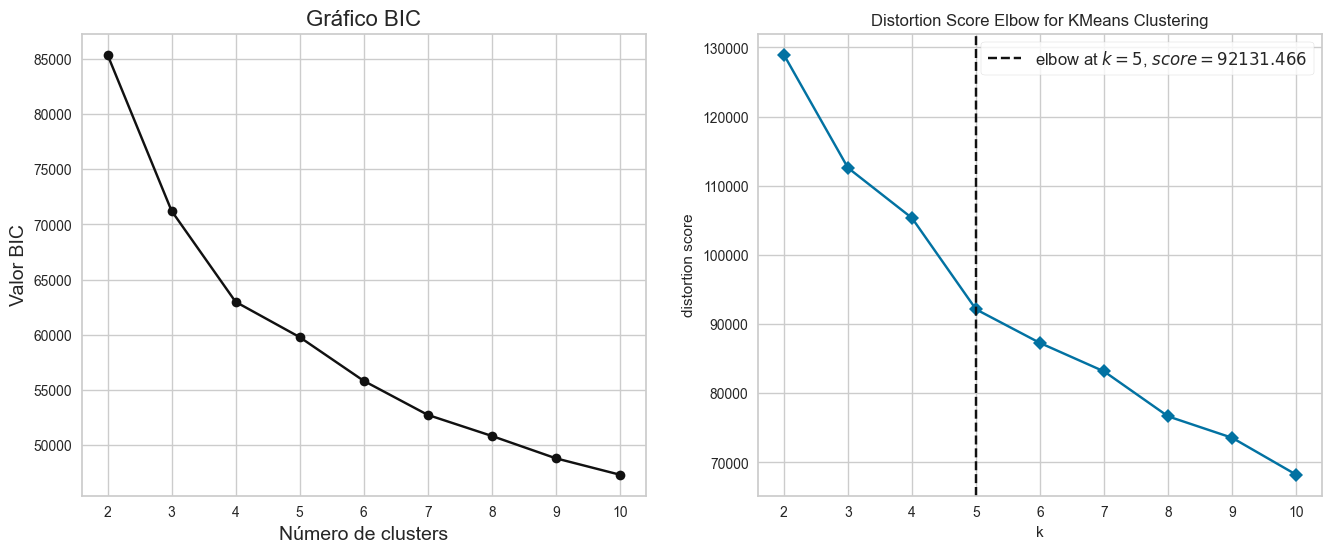

<Figure size 800x550 with 0 Axes>

Mejor k según BIC: 10
Mejor k según Elbow: 5


In [13]:
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
from sklearn.cluster import KMeans # type: ignore
from yellowbrick.cluster import KElbowVisualizer # type: ignore

bic_array = []
K_MAX = 10
K_MIN = 2
N_INIT = 20
RANDOM_STATE= 42

for k in range(K_MIN, K_MAX+1):
    model_bic = KMeans(n_clusters=k, n_init=N_INIT, random_state=RANDOM_STATE)
    groups_bic = model_bic.fit_predict(df)
    bic_array.append(get_bic_values(k, groups_bic, df.values))
        
# Visualización de los resultados con BIC 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(np.arange(K_MIN, K_MAX+1), bic_array, "ko-")
ax1.set_xticks(range(K_MIN, K_MAX+1))
ax1.set_title("Gráfico BIC", fontsize=16)
ax1.set_xlabel("Número de clusters", fontsize=14)
ax1.set_ylabel("Valor BIC", fontsize=14)

# Visualización de los resultados con Elbow Method
elbow_method = KElbowVisualizer(KMeans(random_state=RANDOM_STATE), k=K_MAX, timings=False)
elbow_method.fit(df)
elbow_method.show()

plt.tight_layout()
plt.show()

# Leyendas

# Obtiene el número óptimo de clusters según el método BIC
k_bic = np.argmin(bic_array) + K_MIN

# Obtiene el número óptimo de clusters según el método del codo
k_elbow = elbow_method.elbow_value_

print(f"Mejor k según BIC: {k_bic}")
print(f"Mejor k según Elbow: {k_elbow}")

## 4. Modelo K-means con los mejores parámetros

In [14]:
model = KMeans(n_clusters=k_elbow, n_init=10, random_state=100, verbose=1)
groups = model.fit_predict(df)

Initialization complete
Iteration 0, inertia 129392.80967638371.
Iteration 1, inertia 105778.20507868352.
Iteration 2, inertia 102843.59083820159.
Iteration 3, inertia 102149.39463855396.
Iteration 4, inertia 101750.23581277972.
Iteration 5, inertia 101463.38376777613.
Iteration 6, inertia 101173.20106803243.
Iteration 7, inertia 100961.55319491841.
Iteration 8, inertia 100763.95950616975.
Iteration 9, inertia 100614.88012722867.
Iteration 10, inertia 100529.22447962422.
Iteration 11, inertia 100494.41401111038.
Iteration 12, inertia 100470.26000248549.
Iteration 13, inertia 100437.12832840953.
Iteration 14, inertia 100401.830967816.
Iteration 15, inertia 100359.80839774071.
Iteration 16, inertia 100314.38944069449.
Iteration 17, inertia 100264.20377042641.
Iteration 18, inertia 100210.87476716196.
Iteration 19, inertia 100187.19673364225.
Iteration 20, inertia 100154.27799766215.
Iteration 21, inertia 100092.41826301385.
Iteration 22, inertia 100036.30848746553.
Iteration 23, inertia 

### 4.1. Cálculo de la inertia y los centroides

In [15]:
print(f"\nInertia: {model.inertia_}\n")

centroids = model.cluster_centers_
df_centroids = pd.DataFrame(centroids, columns=df.columns[:model.cluster_centers_.shape[1]])
df_centroids['cluster'] = range(centroids.shape[0])  # Añade una columna 'cluster' con los índices de los centroides

# La columna 'cluster' es el índice del centroide
df_centroids = df_centroids.set_index('cluster')

print("Centroides:")
print("-"*15)
df_centroids


Inertia: 91490.64786990175

Centroides:
---------------


,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
cluster,,,,,,,,,,,,,,,,,
0,0.165782,0.431670,0.907850,0.846802,0.590798,-0.294535,1.081447,1.778931,0.560682,-0.382686,-0.304513,1.165744,0.689668,0.369131,-0.003359,0.383367,0.274004
1,-0.244143,-0.337192,-0.339179,-0.220951,-0.395920,-0.169803,-0.814900,-0.353598,-0.752037,-0.079725,-0.150746,-0.473134,-0.315579,-0.251366,-0.122542,-0.284929,-0.046577
2,-0.442269,0.104381,-0.097298,-0.256264,0.240698,-0.381929,0.911052,-0.398625,1.079636,-0.485376,-0.372172,0.077449,-0.356179,-0.276162,-0.075771,0.404106,-0.046344
3,1.410980,0.414656,7.077361,6.236596,5.273896,0.035821,1.087025,1.891663,1.045609,-0.248755,-0.045397,4.740816,2.161434,4.882121,1.095410,0.830765,0.333341
4,1.469814,0.382140,-0.240987,-0.176098,-0.246378,1.744894,-0.521490,-0.240365,-0.458119,1.782009,1.676842,-0.296379,0.842885,0.647527,0.506027,-0.401879,-0.098910


## 5. PCA

In [16]:
from sklearn.decomposition import PCA # type: ignore

pca = PCA(n_components=2)
features_pca = pca.fit_transform(df)

df_pca = pd.DataFrame(
    features_pca,
    columns=['pca1', 'pca2'])

# Añadir la columna 'cluster' al DataFrame
df_pca['cluster'] = groups

df_pca

,pca1,pca2,cluster
0,-1.683649,-1.072244,1
1,-1.134084,2.509139,4
2,0.969401,-0.383596,0
3,-0.888221,0.004648,1
4,-1.600021,-0.683797,1
...,...,...,...
8945,-0.362572,-2.013434,2
8946,-0.580812,-1.675658,2
8947,-0.928986,-1.808045,2
8948,-2.337848,-0.653601,1


### 5.1. Visualización con PCA 

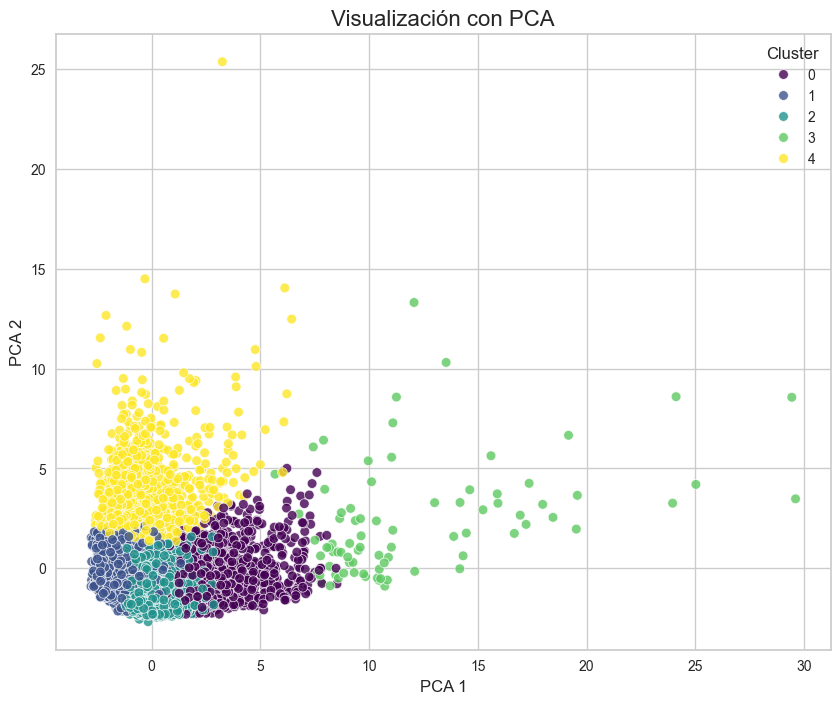

In [17]:
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

# Graficar los puntos coloreados por cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue='cluster', palette='viridis', legend='full', alpha=0.8)

# Agregar título y etiquetas
plt.title('Visualización con PCA', fontsize=16)
plt.xlabel('PCA 1', fontsize=12)
plt.ylabel('PCA 2', fontsize=12)
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)

# Mostrar el gráfico
plt.show()


## 6. Detección de outliers

In [18]:
# import numpy as np # type: ignore
# import pandas as pd # type: ignore
# import matplotlib.pyplot as plt # type: ignore
# from sklearn.cluster import KMeans # type: ignore

# N_INIT = 10 
# RANDOM_STATE = 100  
# N = df.shape[0] # Calcular el número de filas en el DataFrame
# K = groups.max() + 1  # Se suma 1 porque los índices de los clusters empiezan en 0

# # Calcular SSE excluyendo cada observación
# SSE = []
# for excluded in range(N):
#     # Eliminar la observación i
#     X_without_excluded = np.delete(df, excluded, axis=0)
    
#     # Aplicar K-medias a X_sin_i y obtener el índice SSE
#     model = KMeans(n_clusters=K, n_init=N_INIT, random_state=RANDOM_STATE).fit(X_without_excluded)
#     SSE.append(model.inertia_)

# # Detección visual de outliers
# plt.plot(np.arange(N), SSE, "ko-") #  generar los valores de x, donde N representa el número de observaciones en el conjunto de datos.
# plt.title("Índice SSE", fontsize=16)  
# plt.xlabel("Dato Excluido", fontsize=14)  
# plt.ylabel("SSE", fontsize=14)  
# plt.ylim(bottom=0)  # Límite inferior del eje y para asegurar que no se muestren valores negativos
# plt.show()

# # Detección analítica de outliers
# sigma = np.std(SSE)  # Calcular la desviación estándar de los valores SSE
# mu = np.mean(SSE)  # Calcular la media de los valores SSE
# umbral = 2  # Umbral para detectar outliers (2 para distribuciones normales)

# # Si la diferencia absoluta calculada es mayor que un múltiplo del umbral 
# # multiplicado por la desviación estándar (sigma) de los valores SSE, se considera que el índice i es un outlier.
# outliers = [i for i in range(N) if np.abs(SSE[i] - mu) > umbral * sigma] 

# # Crear DataFrame para mostrar los outliers
# outliers_df = pd.DataFrame({'Index': outliers, 'SSE': [SSE[idx] for idx in outliers]})
# outliers_df